# Machine Learning Assignment (Geely Auto)

### Importing and understanding data

In [4577]:
import pandas as pd
import numpy as np

In [4578]:
#importing car price dataset
dataset = pd.read_csv('CarPrice_Assignment.csv')

In [4579]:
#chrcking the shape of the dataset
dataset.shape

(205, 26)

In [4580]:
#understanding the first 5 rows
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data Preparation

In [4581]:
#creating a new column "company_name" as mentioned in the assignment description and dropping the "CarName" column
dataset['company_name']=dataset['CarName'].apply(lambda x:x.split('-')[0])
dataset['company_name']=dataset['CarName'].apply(lambda x:x.split(' ')[0])
dataset.drop(['CarName'],axis=1,inplace=True)

In [4582]:
#validating the above operation
dataset.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [4583]:
#checking unique company names
dataset.company_name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [4584]:
#Correcting company values
dataset['company_name'] = dataset['company_name'].replace({'vw':'volkswagen'})#,,)
dataset['company_name'] = dataset['company_name'].replace({'Volkswagen':'volkswagen'})
dataset['company_name'] = dataset['company_name'].replace({'vokswagen':'volkswagen'})
dataset['company_name'] = dataset['company_name'].replace({'toyouta':'toyota'})
dataset['company_name'] = dataset['company_name'].replace({'Nissan':'nissan'})
dataset['company_name'] = dataset['company_name'].replace({'maxda':'mazda'})
dataset['company_name'] = dataset['company_name'].replace({'porcshce':'porsche'})

In [4585]:
dataset.company_name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [4586]:
#creating dummy variables and replacing the dummy vaiables in the dataset for "fueltype" and deleting the original
fueltype = pd.get_dummies(dataset['fueltype'],drop_first=True)
dataset = pd.concat([dataset,fueltype],axis=1)
dataset.drop(['fueltype'],axis=1,inplace=True)

In [4587]:
#creating dummy variables and replacing the dummy vaiables in the dataset for "aspiration" and deleting the original
aspiration = pd.get_dummies(dataset['aspiration'],drop_first=True)
dataset = pd.concat([dataset,aspiration],axis=1)
dataset.drop(['aspiration'],axis=1,inplace=True)

In [4588]:
#mapping number of doors to respective int value
dataset['doornumber'] = dataset['doornumber'].map({'two': 0, 'four': 1})

In [4589]:
#creating dummy variables and replacing the dummy vaiables in the dataset for "carbody" and deleting the original
carbody = pd.get_dummies(dataset['carbody'],drop_first=True)
dataset = pd.concat([dataset,carbody],axis=1)
dataset.drop(['carbody'],axis=1,inplace=True)

In [4590]:
#creating dummy variables and replacing the dummy vaiables in the dataset for "drivewheel" and deleting the original
drivewheel = pd.get_dummies(dataset['drivewheel'],drop_first=True)
dataset = pd.concat([dataset,drivewheel],axis=1)
dataset.drop(['drivewheel'],axis=1,inplace=True)

In [4591]:
#creating dummy variables and replacing the dummy vaiables in the dataset for "enginelocation" and deleting the original
enginelocation = pd.get_dummies(dataset['enginelocation'],drop_first=True)
dataset = pd.concat([dataset,enginelocation],axis=1)
dataset.drop(['enginelocation'],axis=1,inplace=True)

In [4592]:
#creating dummy variables and replacing the dummy vaiables in the dataset for "enginetype" and deleting the original
enginetype = pd.get_dummies(dataset['enginetype'],drop_first=True)
dataset = pd.concat([dataset,enginetype],axis=1)
dataset.drop(['enginetype'],axis=1,inplace=True)

In [4593]:
#creating dummy variables and replacing the dummy vaiables in the dataset for "cylindernumber" and deleting the original
cylindernumber = pd.get_dummies(dataset['cylindernumber'],drop_first=True)
dataset = pd.concat([dataset,cylindernumber],axis=1)
dataset.drop(['cylindernumber'],axis=1,inplace=True)

In [4594]:
#creating dummy variables and replacing the dummy vaiables in the dataset for "fuelsystem" and deleting the original
fuelsystem = pd.get_dummies(dataset['fuelsystem'],drop_first=True)
dataset = pd.concat([dataset,fuelsystem],axis=1)
dataset.drop(['fuelsystem'],axis=1,inplace=True)

In [4595]:
#creating dummy variables and replacing the dummy vaiables in the dataset for "company_name" and deleting the original
company_name = pd.get_dummies(dataset['company_name'],drop_first=True)
dataset = pd.concat([dataset,company_name],axis=1)
dataset.drop(['company_name'],axis=1,inplace=True)

In [4596]:
#checking shape of the resulting dataset
dataset.shape

(205, 66)

In [4597]:
#checking the first 5 rows of the dataset
dataset.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,2,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,4,2,1,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,5,2,1,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [4598]:
#describing the dataset
dataset.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,0.560976,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,...,0.087805,0.053659,0.034146,0.024390,0.009756,0.029268,0.058537,0.156098,0.058537,0.053659
std,59.322565,1.245307,0.497483,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,...,0.283704,0.225894,0.182050,0.154635,0.098531,0.168970,0.235330,0.363836,0.235330,0.225894
min,1.000000,-2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,103.000000,1.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,154.000000,2.000000,1.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,205.000000,3.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4599]:
#check columns of the datast
dataset.columns

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

In [4600]:
#creating a new attribute - bore_stroke_ratio
dataset['bore_stroke_ratio'] = dataset['boreratio']/dataset['stroke']

In [4601]:
#creating a new attribute - bhp_per_rpm
dataset['bhp_per_rpm'] = dataset['horsepower']/dataset['peakrpm']

In [4602]:
#creating car_volume
dataset['car_volume'] = dataset['carlength']*dataset['carwidth']*dataset['carheight']

In [4603]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
dataset = dataset.apply(normalize)
dataset.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,porsche,renault,saab,subaru,toyota,volkswagen,volvo,bore_stroke_ratio,bhp_per_rpm,car_volume
0,-0.500000,0.433171,-0.560976,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,...,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659,0.322706,0.041905,-0.230573
1,-0.495098,0.433171,-0.560976,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,...,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659,0.322706,0.041905,-0.230573
2,-0.490196,0.033171,-0.560976,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,0.094689,-0.464111,...,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659,-0.324221,0.241960,-0.079129
3,-0.485294,0.233171,0.439024,0.030420,0.038071,0.024350,0.047927,-0.084781,-0.067575,-0.099826,...,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659,-0.118789,-0.043108,0.040923
4,-0.480392,0.233171,0.439024,0.018758,0.038071,0.041016,0.047927,0.104125,0.034312,-0.099826,...,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659,-0.118789,0.011876,0.045799


In [4604]:
#check columns of the datast
dataset.columns

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'bore_stroke_ratio',
       'bhp_per_rpm', 'car_volume'],
      dtype='object')

In [4605]:
# Putting feature variable to X and removing 'carlength','carwidth', 'carheight' since car_volume was introduced
X = dataset[['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'bore_stroke_ratio',
       'bhp_per_rpm', 'car_volume']]
# Putting response variable to y
y = dataset[['price']]

In [4606]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [4607]:
# dropping unwanted variables in train
X_train = X_train.drop(['five','two','rotor','peugeot','horsepower','ohcv','dohcv','audi','turbo','4bbl','boreratio','car_volume','twelve','bhp_per_rpm','bore_stroke_ratio','renault','rear','ohcf','volvo','hardtop','three','wheelbase','l','jaguar','idi','saab','stroke','highwaympg','compressionratio','citympg'],axis=1)
# X_train = X_train.drop(['twelve','car_volume','peakrpm','rear','renault','subaru','three','idi','peugeot','carwidth','highwaympg','citympg','boreratio','stroke','wheelbase','enginesize','dohcv','five'],axis=1)
# X_train = X_train.drop(['carlength','carwidth','carheight','horsepower','peakrpm','boreratio','stroke'],axis=1)

In [4608]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [4609]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [4610]:
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 9)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 
print(X_train.columns)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False  True  True  True  True  True False False False
 False False False False False False False False False False False  True
  True False False False False False False  True False False  True False
 False False]
[19 27 24  2  1  1  1  1  1 21  9 11 10 26 22 18 12 23 25 28 13 20 30  1
  1 15  4  3 14 16 29  1  6  5  1  8  7 17]
Index(['car_ID', 'symboling', 'doornumber', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'peakrpm', 'gas', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'ohc', 'four', 'six', '2bbl', 'mfi',
       'mpfi', 'spdi', 'spfi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'plymouth',
       'porsche', 'subaru', 'toyota', 'volkswagen'],
      dtype='object')


In [4611]:
np.count_nonzero(rfe.support_)

9

In [4612]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'carheight', 'curbweight', 'enginesize', 'peakrpm', 'bmw',
       'buick', 'mitsubishi', 'porsche'],
      dtype='object')

## Building model using sklearn

In [4613]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,carwidth,carheight,curbweight,enginesize,peakrpm,bmw,buick,mitsubishi,porsche
122,-0.175650,-0.243740,-0.141414,-0.109084,0.153011,-0.039024,-0.039024,-0.063415,-0.02439
125,0.199350,-0.293740,0.086282,0.090916,0.153011,-0.039024,-0.039024,-0.063415,0.97561
166,-0.158984,-0.093740,-0.099133,-0.109084,0.601991,-0.039024,-0.039024,-0.063415,-0.02439
1,-0.150650,-0.410407,-0.002935,0.011671,-0.051070,-0.039024,-0.039024,-0.063415,-0.02439
199,0.107683,0.314593,0.233295,0.011671,-0.010254,-0.039024,-0.039024,-0.063415,-0.02439


In [4614]:
# Adding a constant variable and getting required attributes
import statsmodels.api as sm  
required_columns = X_train_rfe.columns
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,carwidth,carheight,curbweight,enginesize,peakrpm,bmw,buick,mitsubishi,porsche
122,1.0,-0.175650,-0.243740,-0.141414,-0.109084,0.153011,-0.039024,-0.039024,-0.063415,-0.02439
125,1.0,0.199350,-0.293740,0.086282,0.090916,0.153011,-0.039024,-0.039024,-0.063415,0.97561
166,1.0,-0.158984,-0.093740,-0.099133,-0.109084,0.601991,-0.039024,-0.039024,-0.063415,-0.02439
1,1.0,-0.150650,-0.410407,-0.002935,0.011671,-0.051070,-0.039024,-0.039024,-0.063415,-0.02439
199,1.0,0.107683,0.314593,0.233295,0.011671,-0.010254,-0.039024,-0.039024,-0.063415,-0.02439


In [4615]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [4616]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     156.5
Date:                Sun, 17 Jun 2018   Prob (F-statistic):           2.92e-66
Time:                        12:30:48   Log-Likelihood:                 207.43
No. Observations:                 143   AIC:                            -394.9
Df Residuals:                     133   BIC:                            -365.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.005     -0.065      0.9

In [4617]:
# Calculating Vif value for selected variables
vif_cal(input_data=dataset[['curbweight', 'enginesize', 'stroke', 'horsepower', 'rear', 'twelve','bmw','price']], dependent_col="price")

,Var,Vif
1,enginesize,5.80
0,curbweight,4.48
3,horsepower,3.49
4,rear,1.34
5,twelve,1.30
2,stroke,1.17
6,bmw,1.09


## Making Predictions

In [4618]:
# Now let's use our model to make predictions.

# Creating X_test_rfe dataframe by dropping variables from X_test
X_test_rfe = X_test[col]
# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe['const']=1.0
# Making predictions
y_pred = lm.predict(X_test_rfe)
#y_pred = y_pred.to_frame('price')

## Model Evaluation

In [4621]:
# Now let's check how well our model is able to make predictions.

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
y_test.shape

(62, 1)

Text(0,0.5,'Car Price')

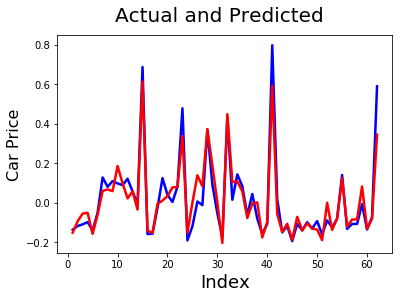

In [4624]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

In [4622]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.06739481026365193
